In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Copyofdata.xlsx - Sheet1.csv to Copyofdata.xlsx - Sheet1.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data2.csv']))

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Copyofdata.xlsx - Sheet1.csv']))
df.head()

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,negative
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",negative
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,positive
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",positive
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,positive


In [ ]:
import pandas as pd

In [ ]:
df['Sentiments'].replace({'negative':0,'positive ':1,'neutral ':1,'positive':1,'negative ':0,'neutral':1,'postive':1,'meg':0,'ne':0,
                          'neu':0,'nef':0, 'neh':0}, inplace=True)
df.head()

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,0.0
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",0.0
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,1.0
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",1.0
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,1.0


In [ ]:
df['Sentiments'].unique()

array([ 0.,  1., nan])

In [ ]:

df

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,0.0
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",0.0
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,1.0
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",1.0
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,1.0
...,...,...
8678,"আশা করি ভোটাররা লুটেরাদের এবার ভোট দিবেনা, না ...",0.0
8679,দুর্নীতির এই উন্নয়ন কে দিয়েছে???,0.0
8680,বাংলাদেশ ব্যাংকের সাবেক ডেপুটি গভর্নর খোন্দকার...,0.0
8681,প্রধানমন্ত্রি কি পত্রিকা পড়েন না,0.0


In [ ]:
df=df.dropna()
df

,Posts,Sentiments
0,একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...,0.0
1,"ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...",0.0
2,দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...,1.0
3,"স্যার, অসাধারণ প্রেজেন্টেশন। স্কুল লাইফে ফির...",1.0
4,\nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...,1.0
...,...,...
8678,"আশা করি ভোটাররা লুটেরাদের এবার ভোট দিবেনা, না ...",0.0
8679,দুর্নীতির এই উন্নয়ন কে দিয়েছে???,0.0
8680,বাংলাদেশ ব্যাংকের সাবেক ডেপুটি গভর্নর খোন্দকার...,0.0
8681,প্রধানমন্ত্রি কি পত্রিকা পড়েন না,0.0


In [ ]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [ ]:
import re
df['texts_prep'] = df.Posts.apply(lambda x: [i for i in re.sub(r'[^\u0980-\u09E3 A-Za-z]+', ' ', str(x)).split() if len(i) > 1])

In [ ]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text
df['Posts']=df['Posts'].apply(preprocessor)

In [ ]:
df['Posts']

0       একদিন... এইরকম কোনো দিনে বিসিএস/বিজিএস উত্তীর্...
1       ক্লাসমেটের পড়া না পারায় ফিক করে হেসে দেওয়া, মজ...
2       দিনের পর দিন বিভিন্ন ইংলিশ টিভি সিরিজ দেখে সময়...
3       স্যার,  অসাধারণ  প্রেজেন্টেশন। স্কুল লাইফে ফির...
4       \nআমি আমার ৮ ঘন্টার কর্মঘন্টার বাইরে সহজে কাউক...
                              ...                        
8678    আশা করি ভোটাররা লুটেরাদের এবার ভোট দিবেনা, না ...
8679                     দুর্নীতির এই উন্নয়ন কে দিয়েছে???
8680    বাংলাদেশ ব্যাংকের সাবেক ডেপুটি গভর্নর খোন্দকার...
8681                     প্রধানমন্ত্রি কি পত্রিকা পড়েন না
8682    এই উন্নয়নের কথা আওয়ামীলীগ বেমামুল চেপে যায়! ব্...
Name: Posts, Length: 8670, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents= None,
                    lowercase=False,
                    preprocessor=None,
                    tokenizer=tokenizer_porter,
                    norm='l2',
                    smooth_idf=True )
y=df.Sentiments.values
X=tfidf.fit_transform(df.Posts)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 44, test_size=0.2)
                                                   

LOGISTIC REGRATION CV


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf= LogisticRegressionCV(cv=5,
                         scoring='accuracy',
                         random_state=0,
                          n_jobs =-1,
                          verbose=3,
                          max_iter=100).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf.score(X_test,y_test)

0.825836216839677

In [ ]:
pred=clf.predict(X_test)
pred

array([0., 1., 0., ..., 0., 1., 1.])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
pred=clf.predict(X_test)
c1=classification_report(y_test,pred)
print(c1)

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       813
         1.0       0.84      0.83      0.83       921

    accuracy                           0.83      1734
   macro avg       0.83      0.83      0.83      1734
weighted avg       0.83      0.83      0.83      1734



In [ ]:
cm=confusion_matrix(y_test,pred)
cm

array([[709, 104],
       [482, 439]])

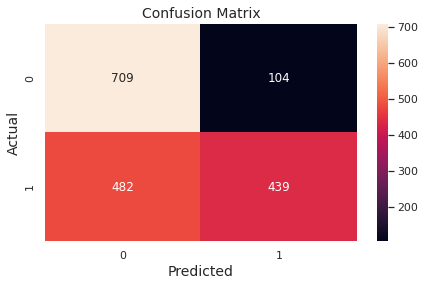

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.set()
f = sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix", fontdict={'fontsize': 14})
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual",  fontsize=14)
plt.show()

LOGISTIC REGRATION



In [ ]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()
lc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=lc.predict(X_test)
c1=classification_report(y_test,pred)
print(c1)

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       813
         1.0       0.72      0.76      0.74       921

    accuracy                           0.72      1734
   macro avg       0.72      0.71      0.71      1734
weighted avg       0.72      0.72      0.72      1734



In [ ]:
lc.score(X_test,y_test)

0.7168396770472895

SVM

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(C=2,kernel='linear',gamma=21)
clf_svm.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=21, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred=clf_svm.predict(X_test)
c1=classification_report(y_test,pred)
print(c1)

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       813
         1.0       0.79      0.75      0.77       921

    accuracy                           0.76      1734
   macro avg       0.76      0.76      0.76      1734
weighted avg       0.76      0.76      0.76      1734



In [ ]:
clf_svm.score(X_test,y_test)

0.7612456747404844

In [ ]:
from sklearn.linear_model import SGDClassifier
cl = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
cl.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred=cl.predict(X_test)
c1=classification_report(y_test,pred)
print(c1)

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       813
         1.0       0.78      0.76      0.77       921

    accuracy                           0.75      1734
   macro avg       0.75      0.75      0.75      1734
weighted avg       0.76      0.75      0.76      1734



In [ ]:
cl.score(X_test,y_test)

0.7537485582468282

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred=nb.predict(X_test)
c1=classification_report(y_test,pred)
print(c1)

              precision    recall  f1-score   support

         0.0       0.60      0.87      0.71       813
         1.0       0.81      0.48      0.60       921

    accuracy                           0.66      1734
   macro avg       0.70      0.67      0.65      1734
weighted avg       0.71      0.66      0.65      1734



In [ ]:
nb.score(X_test,y_test)

0.8166089965397924